Wczytanie wartości oraz pierwsze kroki do wyczyszczenia zbioru danych.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns      
import ydata_profiling

%matplotlib inline
sns.set_theme()


pd.options.mode.copy_on_write = True


data = pd.read_csv("boxing_matches.csv")
num_rows_unfiltered_data = data.shape[0]


#columns_to_check = ['age_A', 'age_B', 'height_A', 'height_B', 'reach_A', 'reach_B',
#                    'stance_A', 'stance_B', 'weight_A', 'weight_B', 'won_A', 'won_B',
#                    'lost_A', 'lost_B', 'drawn_A', 'drawn_B', 'kos_A', 'kos_B', 'result',
#                    'decision']

#filtered_data = data.dropna(subset=columns_to_check)

#filtered_data = filtered_data[(filtered_data['reach_A'] <= 300) & (filtered_data['reach_B'] <= 300)]
#filtered_data = data[(data['reach_A'] <= 300) & (data['reach_B'] <= 300)]
#filtered_data = data.dropna(thresh = 12)
filtered_data = data.drop_duplicates()

#filtered_data.drop_duplicates(inplace=True)

num_rows_filtered_data = filtered_data.shape[0]
#print(f"Nie przefiltrowanych danych jest: {num_rows_unfiltered_data}, po przefiltrowaniu, tak aby zostały wiersze, które zawierają: \n{columns_to_check}\nZostało {num_rows_filtered_data} wierszy")

print(data.shape)
print(filtered_data.shape)

(387427, 26)
(356740, 26)


Sprawdzenie czy kolumny z ocenami sędziów są wartościowe w dalszej pracy na zbiorze.

<Axes: title={'center': 'Reach B available'}, xlabel='reach_B', ylabel='count'>

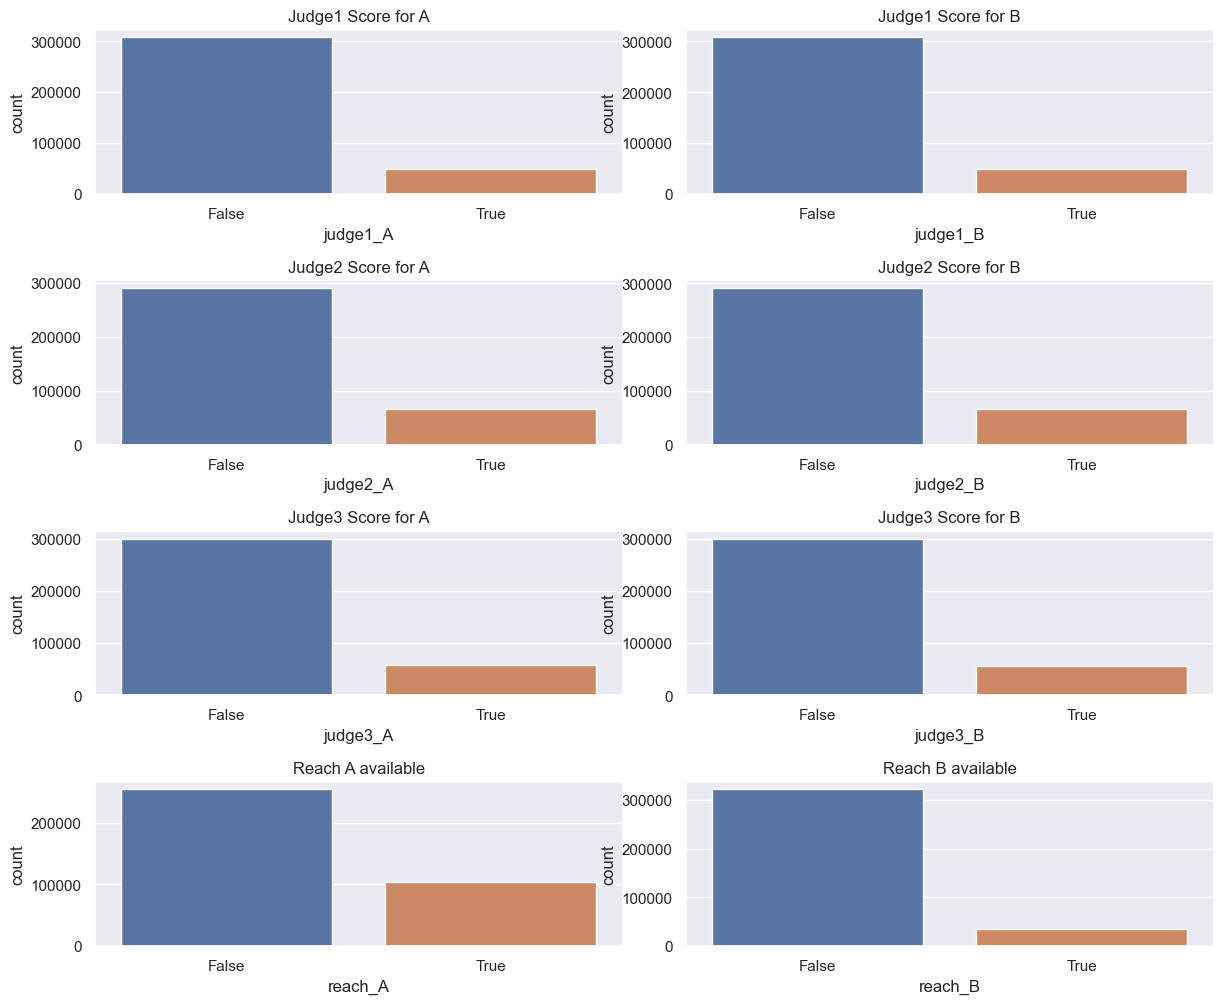

In [2]:
fig, ax =plt.subplots(4,2,figsize=(12,10))

ax[0,0].set_title('Judge1 Score for A')
ax[0,0].set_xlabel('Judge1_A')
ax[0,1].set_title('Judge1 Score for B')
ax[1,0].set_title('Judge2 Score for A')
ax[1,1].set_title('Judge2 Score for B')
ax[2,0].set_title('Judge3 Score for A')
ax[2,1].set_title('Judge3 Score for B')
ax[3,0].set_title('Reach A available')
ax[3,1].set_title('Reach B available')
plt.tight_layout() 
sns.countplot(data= filtered_data['judge1_A'].notnull().reset_index(), x = 'judge1_A',ax=ax[0,0])
sns.countplot(data= filtered_data['judge1_B'].notnull().reset_index(), x = 'judge1_B',ax=ax[0,1])
sns.countplot(data= filtered_data['judge2_A'].notnull().reset_index(), x = 'judge2_A',ax=ax[1,0])
sns.countplot(data= filtered_data['judge2_B'].notnull().reset_index(), x = 'judge2_B',ax=ax[1,1])
sns.countplot(data= filtered_data['judge3_A'].notnull().reset_index(), x = 'judge3_A',ax=ax[2,0])
sns.countplot(data= filtered_data['judge3_B'].notnull().reset_index(), x = 'judge3_B',ax=ax[2,1])
sns.countplot(data= filtered_data['reach_A'].notnull().reset_index() , x = 'reach_A', ax=ax[3,0])
sns.countplot(data= filtered_data['reach_B'].notnull().reset_index() , x = 'reach_B', ax=ax[3,1])

Ponieważ większość wartości w tych kolumnach jest NaN to postanawiam usunąć te kolumny

In [3]:
filtered_data.drop(columns = ['judge1_A','judge1_B','judge2_A','judge2_B','judge3_A','judge3_B'],inplace = True)

In [4]:
print("Describe\n")
print(filtered_data.describe(include='all'))

Describe

                age_A          age_B       height_A       height_B  \
count   325673.000000  238813.000000  230213.000000  124152.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean        24.425866      26.583624     172.761647     172.837594   
std          6.621930      10.828465       9.160605       9.477690   
min        -74.000000     -74.000000       2.000000      15.000000   
25%         21.000000      23.000000     166.000000     166.000000   
50%         24.000000      26.000000     173.000000     173.000000   
75%         27.000000      30.000000     178.000000     179.000000   
max       1818.000000    2015.000000     255.000000     255.000000   

              reach_A       reach_B  stance_A  stance_B       weight_A  \
count   103142.000000  34715.000000    211956    211956  125779.000000   
u

W kodzie zawarte są błędne dane jak np dane z wiekiem w postaci 1818 albo 2015, dlatego czyszcze zbiór.

In [5]:
filtered_data = filtered_data[(filtered_data['reach_A'] <= 300) & (filtered_data['reach_B'] <= 300)]
filtered_data = filtered_data[(filtered_data['weight_A'] >= 90) & (filtered_data['weight_B'] >= 90)]



Sprawdzam czy kolumny zawierają różniące się wartości, jeśli nie to też będzie to powodem do ich usunięcia.

In [6]:
def check(col):
    var_A = col[0]
    var_B = col[1]
    return (var_A != var_B)

filtered_data[filtered_data[['stance_A', 'stance_B']].notnull().apply(check, axis=1)].shape

non_null_stance = filtered_data[(filtered_data['stance_A'].notnull()) & (filtered_data['stance_B'].notnull())][['stance_A', 'stance_B']]
print("Wartosci gdzie 'stance_A', 'stance_B' nie są null",non_null_stance.shape[0])
print("Różnych między sobą:",non_null_stance[non_null_stance.apply(check, axis=1)].shape[0])

Wartosci gdzie 'stance_A', 'stance_B' nie są null 6557
Różnych między sobą: 0


W wierszach gdzie wartości stance_A i stance_B nie są null, okazuje się, że są sobie tożsame, więc nie ma sensu ich brać po uwagę. Ich korelacja wynosi 1.

In [7]:
filtered_data.drop(columns = ['stance_A', 'stance_B'],inplace = True)
print(filtered_data.columns)
print(filtered_data.dtypes)
print(filtered_data.shape)
print(filtered_data.describe(include='all'))

Index(['age_A', 'age_B', 'height_A', 'height_B', 'reach_A', 'reach_B',
       'weight_A', 'weight_B', 'won_A', 'won_B', 'lost_A', 'lost_B', 'drawn_A',
       'drawn_B', 'kos_A', 'kos_B', 'result', 'decision'],
      dtype='object')
age_A       float64
age_B       float64
height_A    float64
height_B    float64
reach_A     float64
reach_B     float64
weight_A    float64
weight_B    float64
won_A         int64
won_B         int64
lost_A        int64
lost_B        int64
drawn_A       int64
drawn_B       int64
kos_A         int64
kos_B       float64
result       object
decision     object
dtype: object
(7094, 18)
              age_A        age_B     height_A     height_B      reach_A  \
count   7073.000000  7013.000000  7084.000000  7076.000000  7094.000000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean    

Sprawdzanie kolejnych wierszy

In [8]:
print("Wszystkie wiersze, które zostały do tej pory: ", filtered_data.shape[0])

non_null_ages = filtered_data[(filtered_data['age_A'].notnull()) & (filtered_data['age_B'].notnull())][['age_A', 'age_B']]
print("Wartosci gdzie 'age_A', 'age_B' nie są null",non_null_ages.shape[0])
print("Różnych między sobą:",non_null_ages[non_null_ages.apply(check, axis=1)].shape[0])

non_null_height = filtered_data[(filtered_data['height_A'].notnull()) & (filtered_data['height_B'].notnull())][['height_A', 'height_B']]
print("Wartosci gdzie 'height_A', 'height_B' nie są null",non_null_height.shape[0])
print("Różnych między sobą:",non_null_height[non_null_height.apply(check, axis=1)].shape[0])

non_null_reach = filtered_data[(filtered_data['reach_A'].notnull()) & (filtered_data['reach_B'].notnull())][['reach_A', 'reach_B']]
print("Wartosci gdzie 'reach_A', 'reach_B' nie są null",non_null_reach.shape[0])
print("Różnych między sobą:",non_null_reach[non_null_reach.apply(check, axis=1)].shape[0])

non_null_weight = filtered_data[(filtered_data['weight_A'].notnull()) & (filtered_data['weight_B'].notnull())][['weight_A', 'weight_B']]
print("Wartosci gdzie 'weight_A', 'weight_B' nie są null",non_null_weight.shape[0])
print("Różnych między sobą:",non_null_weight[non_null_weight.apply(check, axis=1)].shape[0])

non_null_won = filtered_data[(filtered_data['won_A'].notnull()) & (filtered_data['won_B'].notnull())][['won_A', 'won_B']]
print("Wartosci gdzie 'won_A', 'won_B' nie są null",non_null_won.shape[0])
print("Różnych między sobą:",non_null_won[non_null_won.apply(check, axis=1)].shape[0])

non_null_lost = filtered_data[(filtered_data['lost_A'].notnull()) & (filtered_data['lost_B'].notnull())][['lost_A', 'lost_B']]
print("Wartosci gdzie 'lost_A', 'lost_B' nie są null",non_null_lost.shape[0])
print("Różnych między sobą:",non_null_lost[non_null_lost.apply(check, axis=1)].shape[0])

non_null_drawn = filtered_data[(filtered_data['drawn_A'].notnull()) & (filtered_data['drawn_B'].notnull())][['drawn_A', 'drawn_B']]
print("Wartosci gdzie 'drawn_A', 'drawn_B' nie są null",non_null_drawn.shape[0])
print("Różnych między sobą:",non_null_drawn[non_null_drawn.apply(check, axis=1)].shape[0])

non_null_kos = filtered_data[(filtered_data['kos_A'].notnull()) & (filtered_data['kos_B'].notnull())][['kos_A', 'kos_B']]
print("Wartosci gdzie 'kos_A', 'kos_B' nie są null",non_null_kos.shape[0])
print("Różnych między sobą:",non_null_kos[non_null_kos.apply(check, axis=1)].shape[0])



Wszystkie wiersze, które zostały do tej pory:  7094
Wartosci gdzie 'age_A', 'age_B' nie są null 6994
Różnych między sobą: 6550
Wartosci gdzie 'height_A', 'height_B' nie są null 7066
Różnych między sobą: 6352
Wartosci gdzie 'reach_A', 'reach_B' nie są null 7094
Różnych między sobą: 6495
Wartosci gdzie 'weight_A', 'weight_B' nie są null 7094
Różnych między sobą: 4699
Wartosci gdzie 'won_A', 'won_B' nie są null 7094
Różnych między sobą: 6755
Wartosci gdzie 'lost_A', 'lost_B' nie są null 7094
Różnych między sobą: 6296
Wartosci gdzie 'drawn_A', 'drawn_B' nie są null 7094
Różnych między sobą: 4656
Wartosci gdzie 'kos_A', 'kos_B' nie są null 7094
Różnych między sobą: 6599


Kolumnami, które są do rozważenia pod względem usunięcia są jedynie weight_A, oraz weight_B.

Zmieniam wartości w kolumnie result, na numeryczne. 1 - win_A, 2 - draw, 3 - win_B

In [9]:
filtered_data['result'] = filtered_data['result'].replace({'win_A': 1, 'draw': 2, 'win_B': 3})
filtered_data.head(5)


,age_A,age_B,height_A,height_B,reach_A,reach_B,weight_A,weight_B,won_A,won_B,lost_A,lost_B,drawn_A,drawn_B,kos_A,kos_B,result,decision
0,35.0,27.0,179.0,175.0,178.0,179.0,160.0,160.0,37,49,0,1,0,1,33,34.0,2,SD
1,26.0,31.0,175.0,185.0,179.0,185.0,164.0,164.0,48,50,1,2,1,1,34,32.0,1,UD
3,25.0,29.0,175.0,174.0,179.0,180.0,155.0,155.0,46,31,1,3,1,0,32,19.0,1,KO
6,23.0,31.0,175.0,175.0,179.0,188.0,155.0,155.0,43,19,1,1,1,2,31,12.0,1,SD
10,22.0,28.0,175.0,177.0,179.0,175.0,154.0,153.0,40,30,0,4,1,0,29,18.0,1,TKO


Pozostałe kolumny mają wszystkie oprócz decision wartości liczbowe.

In [10]:
print(filtered_data.dtypes)

age_A       float64
age_B       float64
height_A    float64
height_B    float64
reach_A     float64
reach_B     float64
weight_A    float64
weight_B    float64
won_A         int64
won_B         int64
lost_A        int64
lost_B        int64
drawn_A       int64
drawn_B       int64
kos_A         int64
kos_B       float64
result        int64
decision     object
dtype: object


Występujące decyzje, oraz ich opis:
- UD (Unanimous Decision) - Decyzja jednomyślna
- TKO (Technical Knockout) - Techniczny nokaut
- KO (Knockout) - Nokaut
- PTS (Points) - Decyzja punktowa
- SD (Split Decision) - Decyzja podzielona
- MD (Majority Decision) - Decyzja większościowa
- RTD (Retirement) - Przerwanie walki
- NWS (No Contest, Withdrawn or Stopped) - Brak rozstrzygnięcia (walka przerwana lub wycofana)
- DQ (Disqualification) - Dyskwalifikacja
- TD (Technical Decision) - Decyzja techniczna

In [11]:
decision_counts = filtered_data['decision'].value_counts()
print(decision_counts)

decision
UD     2186
TKO    1942
KO      980
PTS     598
SD      463
MD      323
RTD     256
NWS     179
TD       97
DQ       70
Name: count, dtype: int64


Opis danych i ich przedstawienie w sposób graficzny.

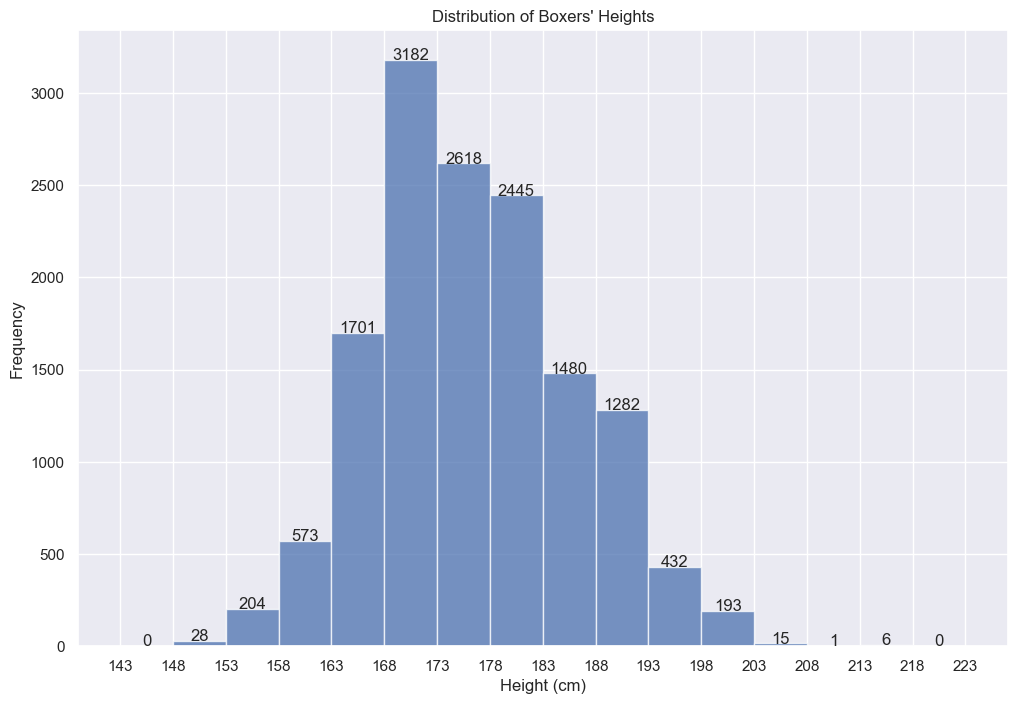

In [12]:
boxersHeight = pd.concat([filtered_data['height_A'], filtered_data['height_B']])
boxersHeight = boxersHeight.dropna()


min_height = boxersHeight.min() - 5 
max_height = boxersHeight.max() + 5 

bins = range(int(min_height), int(max_height) + 5, 5)
number_of_bins = len(bins) - 1 

plt.figure(figsize=(12,8))
plt.title('Distribution of Boxers\' Heights')
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')
plt.grid(True)
plt.xticks(bins)


arr=plt.hist(boxersHeight, bins=bins, alpha=0.75)
for i in range(len(arr[0])):
    plt.text(arr[1][i] + (arr[1][1]-arr[1][0])/2, arr[0][i], str(int(arr[0][i])), ha='center')

plt.show()

11


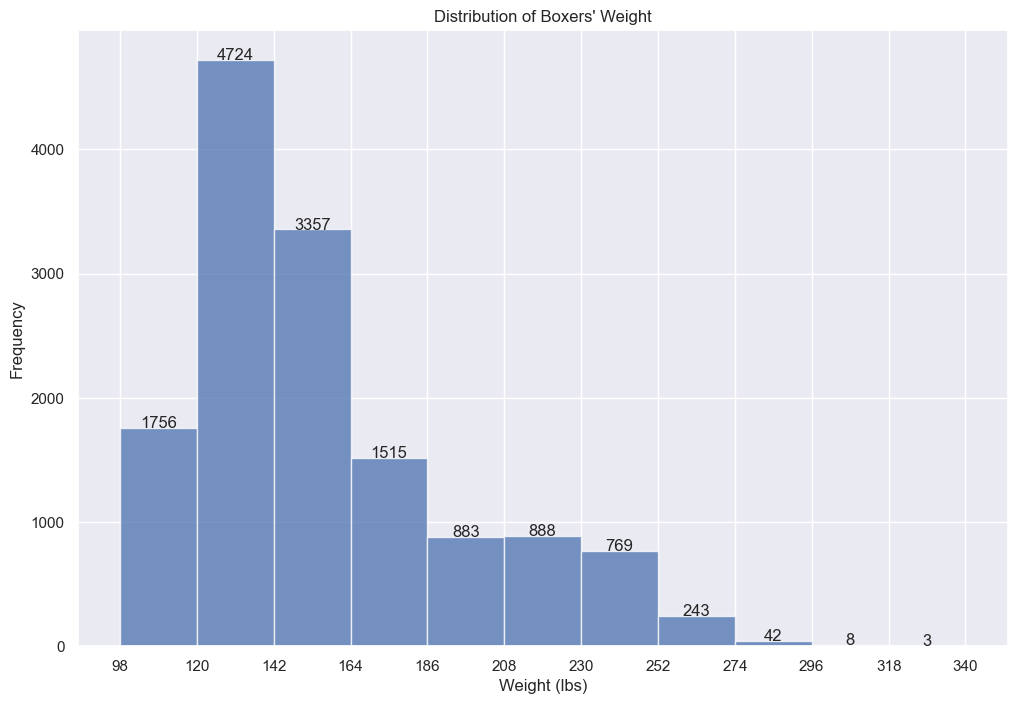

In [13]:
boxersWeight = pd.concat([filtered_data['weight_A'], filtered_data['weight_B']])
boxersWeight = boxersWeight.dropna()

min_weight = boxersWeight.min() - 5 
max_weight = boxersWeight.max() + 5 

bins = range(int(min_weight), int(max_weight) + 22, 22)
number_of_bins = len(bins) - 1 
print(number_of_bins)

plt.figure(figsize=(12,8))
plt.title('Distribution of Boxers\' Weight')
plt.xlabel('Weight (lbs)')
plt.ylabel('Frequency')
plt.grid(True)
plt.xticks(bins)


arr=plt.hist(boxersWeight, bins=bins, alpha=0.75)
for i in range(len(arr[0])):
    plt.text(arr[1][i] + (arr[1][1]-arr[1][0])/2, arr[0][i], str(int(arr[0][i])), ha='center')

plt.show()

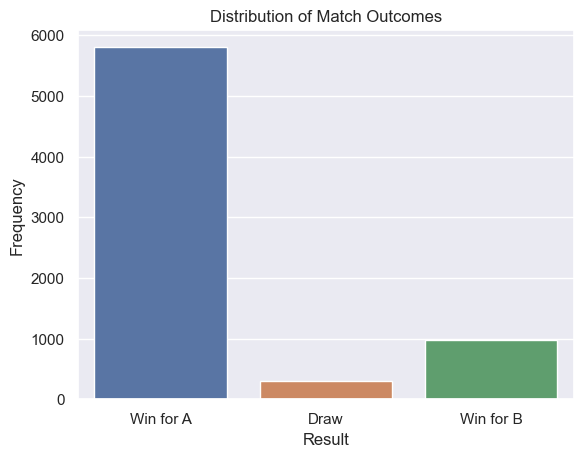

In [14]:

# Assuming 'df' is your DataFrame
sns.countplot(x='result', data=filtered_data)
plt.title('Distribution of Match Outcomes')
plt.xlabel('Result')
plt.ylabel('Frequency')
plt.xticks(ticks=[0, 1, 2], labels=['Win for A', 'Draw', 'Win for B'])  # Adjust labels as necessary
plt.show()

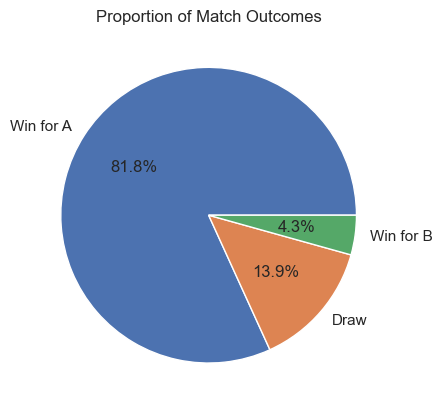

In [15]:
result_counts = filtered_data['result'].value_counts()
plt.pie(result_counts, labels=['Win for A', 'Draw', 'Win for B'], autopct='%1.1f%%')
plt.title('Proportion of Match Outcomes')
plt.show()

result                1   2    3
weight_class                    
Strawweight          47   5    4
Light Flyweight      96   5   21
Flyweight           155   8   23
Superflyweight      168  11   25
Bantamweight        195  11   30
Superbantamweight   249  13   36
Featherweight       322  22   55
Superfeatherweight  369  24   56
Lightweight         461  27   82
Lightwelterweight   454  23   90
Welterweight        537  22   71
Superwelterweight   415  28   76
Middleweight        381  18   82
Supermiddleweight   335  13   50
Light Heavyweight   218  11   42
Cruiserweight       408  24   80
Heavyweight         817  26  131
Non-standard Class  176  16   30



0 0 0
1 1 0
2 2 0
3 3 0
4 4 0
5 5 0
6 6 0
7 7 0
8 8 0
9 9 0
10 10 0
11 11 0
12 12 0
13 13 0
14 14 0
15 15 0
16 16 0
17 0 1
18 1 1
19 2 1
20 3 1
21 4 1
22 5 1
23 6 1
24 7 1
25 8 1
26 9 1
27 10 1
28 11 1
29 12 1
30 13 1
31 14 1
32 15 1
33 16 1
34 0 2
35 1 2
36 2 2
37 3 2
38 4 2
39 5 2
40 6 2
41 7 2
42 8 2
43 9 2
44 10 2
45 11 2
46 12 2
4

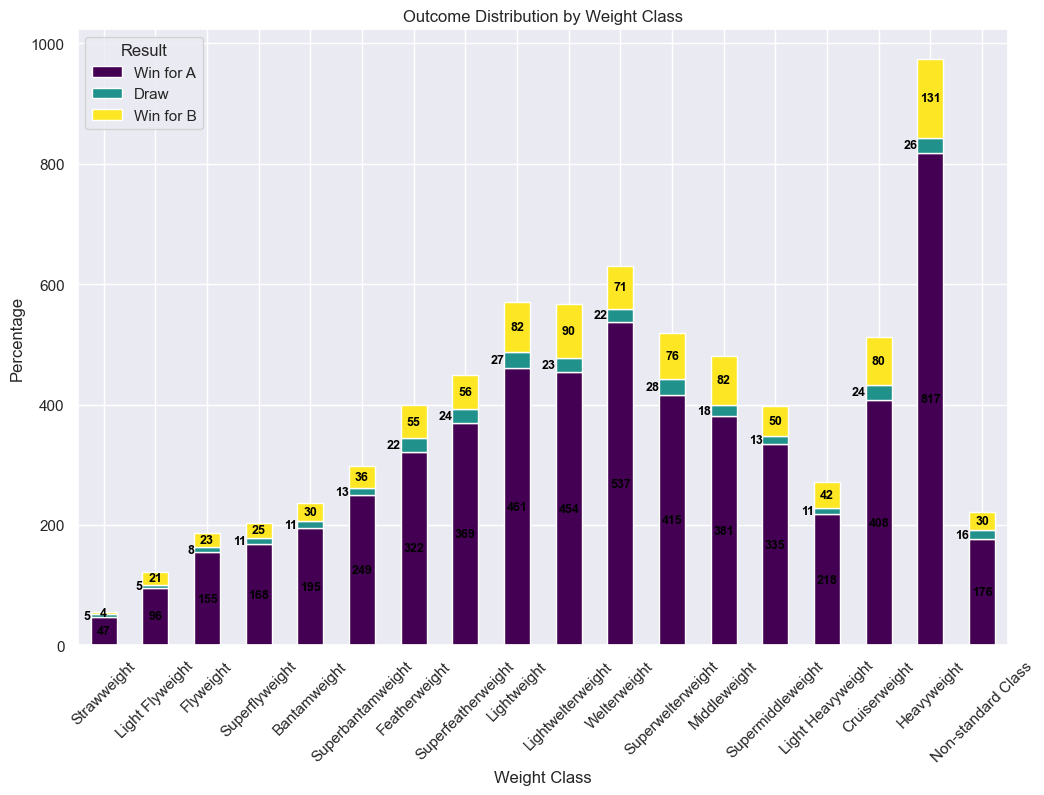

In [16]:
weight_classes = [105, 108, 112, 115, 118, 122, 126, 130, 135, 140, 147, 154, 160, 168, 175, 200]
weight_classes_names = ["Strawweight", "Light Flyweight", "Flyweight", "Superflyweight", "Bantamweight", "Superbantamweight", "Featherweight", "Superfeatherweight", "Lightweight", "Lightwelterweight", "Welterweight", "Superwelterweight", "Middleweight", "Supermiddleweight", "Light Heavyweight", "Cruiserweight", "Heavyweight", "Non-standard Class"]

def determine_weight_class(row):
    # Check if both weights are within the same class
    for i, wc in enumerate(weight_classes):
        #print(f"wc {wc}, row['weight_A'] {row['weight_A']}, row['weight_B'] {row['weight_B']}")
        if wc >= row['weight_A'] and wc >= row['weight_B']:
            #print(weight_classes_names[i])
            return weight_classes_names[i]
    # If no class fits both, return non-standard class
    if 200 < row['weight_A'] and 200 < row['weight_B']:
        return f"Heavyweight"
    return "Non-standard Class"

# Apply function to DataFrame
filtered_data['weight_class'] = filtered_data.apply(determine_weight_class, axis=1)

# Create a crosstab for a stacked bar chart
result_by_weight = pd.crosstab(filtered_data['weight_class'], filtered_data['result'])
result_by_weight = result_by_weight.reindex(weight_classes_names)
print(result_by_weight)
print("\n\n")


# Plotting the data
result_by_weight.plot(kind='bar', stacked=True, colormap='viridis', figsize=(12,8))
plt.title('Outcome Distribution by Weight Class')
plt.xlabel('Weight Class')
plt.ylabel('Percentage')
plt.legend(title='Result', labels=['Win for A', 'Draw', 'Win for B'])
plt.xticks(rotation=45)  # Improve readability of x-axis labels

# Ensure ax is treated as a single AxesSubplot
ax = plt.gca()

#print(result_by_weight.iloc[17,1])

#print(result_by_weight.iloc[0, 2])
# Adding text annotations
for n, bar in enumerate(ax.patches):
    print(n, n % 17, n // 17)
    # Get the position of the bar
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_y() + bar.get_height() / 2
    # Find the corresponding count from the non-normalized crosstab
    value = result_by_weight.iloc[n % 18, n // 18]  # This assumes results are in the correct order
    #print(value)
    if value != 0:  # Only annotate non-zero values to avoid clutter
        ha_value = 'right' if n // 18 == 1 else 'center'
        ax.text((x if n // 18 != 1 else x-bar.get_width()/2), y, str(value), ha=ha_value, va='center', fontweight='bold', color='black', fontsize=9)

plt.show()

Drzewo decyzyjne

In [17]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7094 entries, 0 to 387151
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age_A         7073 non-null   float64
 1   age_B         7013 non-null   float64
 2   height_A      7084 non-null   float64
 3   height_B      7076 non-null   float64
 4   reach_A       7094 non-null   float64
 5   reach_B       7094 non-null   float64
 6   weight_A      7094 non-null   float64
 7   weight_B      7094 non-null   float64
 8   won_A         7094 non-null   int64  
 9   won_B         7094 non-null   int64  
 10  lost_A        7094 non-null   int64  
 11  lost_B        7094 non-null   int64  
 12  drawn_A       7094 non-null   int64  
 13  drawn_B       7094 non-null   int64  
 14  kos_A         7094 non-null   int64  
 15  kos_B         7094 non-null   float64
 16  result        7094 non-null   int64  
 17  decision      7094 non-null   object 
 18  weight_class  7094 non-null   o

In [18]:
numeric_columns = filtered_data.select_dtypes(include=["float64", "int64"]).columns

for column in numeric_columns:
    filtered_data.fillna({column: filtered_data[column].mean()}, inplace=True)

filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7094 entries, 0 to 387151
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age_A         7094 non-null   float64
 1   age_B         7094 non-null   float64
 2   height_A      7094 non-null   float64
 3   height_B      7094 non-null   float64
 4   reach_A       7094 non-null   float64
 5   reach_B       7094 non-null   float64
 6   weight_A      7094 non-null   float64
 7   weight_B      7094 non-null   float64
 8   won_A         7094 non-null   int64  
 9   won_B         7094 non-null   int64  
 10  lost_A        7094 non-null   int64  
 11  lost_B        7094 non-null   int64  
 12  drawn_A       7094 non-null   int64  
 13  drawn_B       7094 non-null   int64  
 14  kos_A         7094 non-null   int64  
 15  kos_B         7094 non-null   float64
 16  result        7094 non-null   int64  
 17  decision      7094 non-null   object 
 18  weight_class  7094 non-null   o

Ponieważ jest przewaga danych dla wygranego boksera A, to zmieniam wartości w kolumnach, tak aby wyrównać ten dysbalans.

In [19]:
import pandas as pd
import numpy as np

# Assuming 'df' is your DataFrame

# Mask for records where fighter A is the winner (result == 1)
mask_winner_A = filtered_data['result'] == 1
# Mask for records where fighter B is the winner (result == 3)
mask_winner_B = filtered_data['result'] == 3

# Calculate total number of winner A and winner B records
total_winners = np.sum(mask_winner_A) + np.sum(mask_winner_B)

# Calculate half of the total number of winners (A and B)
half_total_winners = total_winners // 2

# Number of winner B records
num_winner_B = np.sum(mask_winner_B)

# Number to swap (half of the total minus the number of winner B)
num_to_swap = half_total_winners - num_winner_B

# Select indices of winner A to swap
# Using np.random.choice to randomly select the calculated number of indices to swap
indices_to_swap = np.random.choice(filtered_data[mask_winner_A].index, size=num_to_swap, replace=False)

# Columns to swap
swap_cols = ['age', 'height', 'reach', 'weight', 'won', 'lost', 'drawn', 'kos']
swap_cols_A = [col + '_A' for col in swap_cols]
swap_cols_B = [col + '_B' for col in swap_cols]

# Perform the swap
filtered_data.loc[indices_to_swap, swap_cols_A + swap_cols_B] = filtered_data.loc[indices_to_swap, swap_cols_B + swap_cols_A].values

# Update the 'result' column for swapped indices
filtered_data.loc[indices_to_swap, 'result'] = 3  # Changing result to indicate that now B is the winner

# Verify the changes
print(filtered_data['result'].value_counts())


result
1    3394
3    3393
2     307
Name: count, dtype: int64


Tworze klasyfikator dla drzewa decyzyjnego.

In [20]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.model_selection import train_test_split, GridSearchCV


In [21]:
feature_cols = ['age_A', 'age_B', 'height_A', 'height_B', 'reach_A', 'reach_B',
                'weight_A', 'weight_B', 'won_A', 'won_B', 'lost_A', 'lost_B',
                'drawn_A', 'drawn_B', 'kos_A', 'kos_B']

X = filtered_data[feature_cols]  # Features
y = filtered_data['result']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(class_weight='balanced')

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.6049788633161108


Dokładność to: 0.6007515265382809, jednak aby uzyskać lepszy wynik, korzystam z "GridSearchCV".

In [24]:
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, classification_report
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Oversampling with SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Define the parameter grid
param_grid = {
    'max_depth': [2,3,4],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['gini', 'entropy']
}

# GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=3, scoring='f1_macro', verbose=2)

# Fit the grid search to the data
#grid_search.fit(X_train, y_train)
grid_search.fit(X_resampled, y_resampled)


# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Use the best estimator
best_clf = grid_search.best_estimator_

# Predict the response for test dataset
y_pred = best_clf.predict(X_test)

# Model Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score (Macro):", f1_score(y_test, y_pred, average='macro'))
print("Classification Report:\n", classification_report(y_test, y_pred))

Fitting 3 folds for each of 72 candidates, totalling 216 fits
[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_lea

Wizualizacja drzewa.

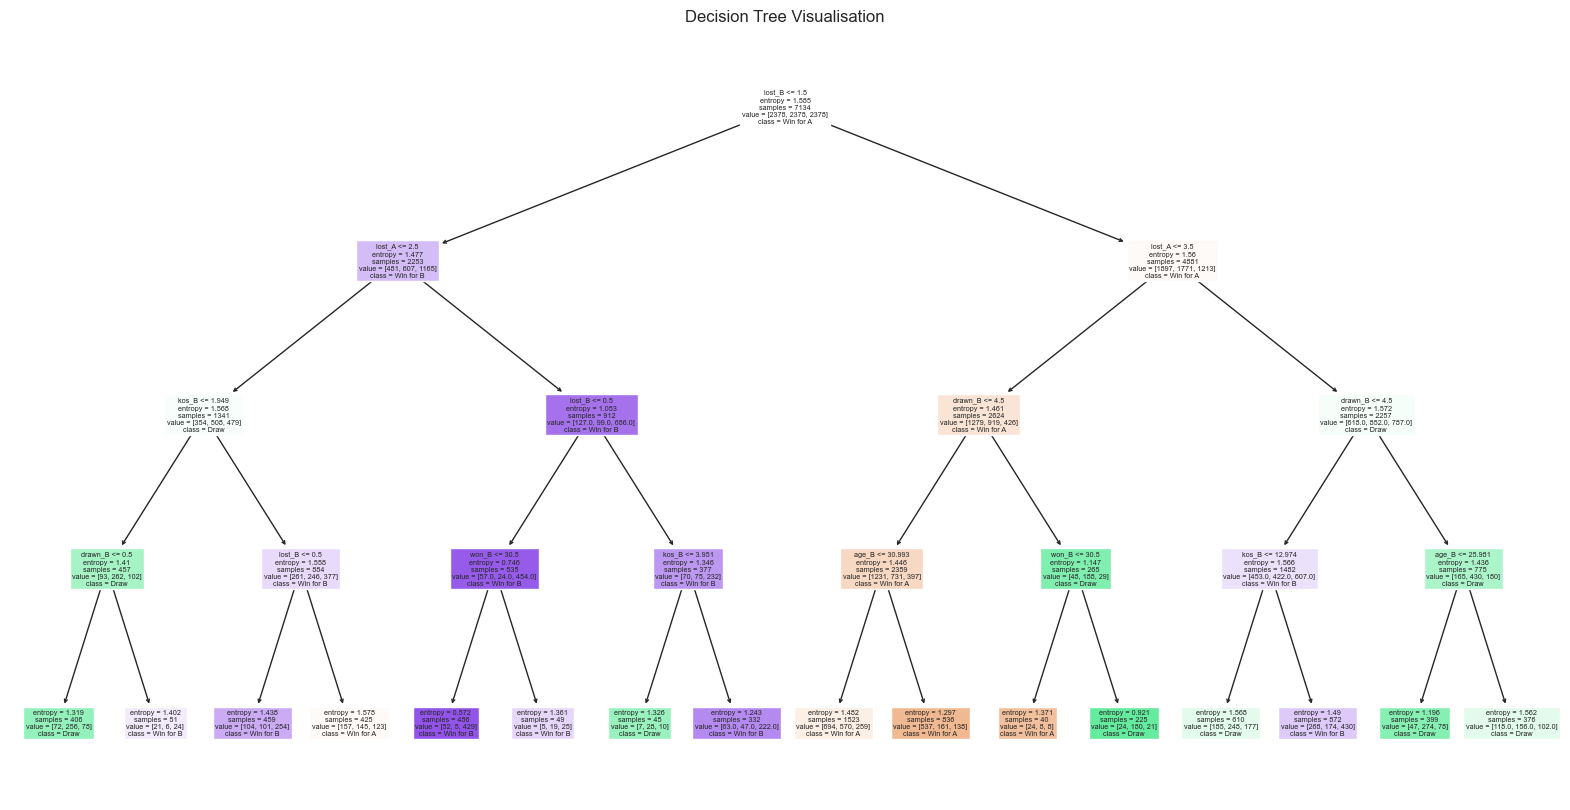

In [25]:
plt.figure(figsize=(20,10))
plot_tree(best_clf, feature_names=feature_cols, class_names=["Win for A", "Draw", "Win for B"], filled=True)
plt.title('Decision Tree Visualisation')
plt.show()

Regresja prosta liniowa, opisująca zależność wzrostu od wagi bokserów.

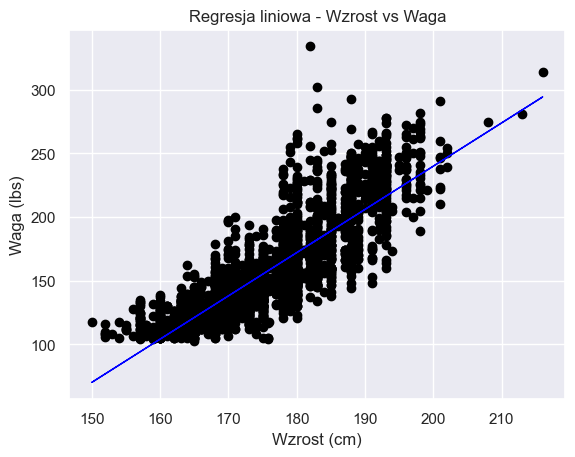

Współczynnik kierunkowy (slope): 3.3953429955700383
Punkt przecięcia z osią Y (intercept): -439.0585949987103


In [30]:
from sklearn.linear_model import LinearRegression

# Tworzenie DataFrame'ów dla zawodników A i B
df_A = filtered_data[['height_A', 'weight_A']].rename(columns={'height_A': 'height', 'weight_A': 'weight'})
df_B = filtered_data[['height_B', 'weight_B']].rename(columns={'height_B': 'height', 'weight_B': 'weight'})

# Łączenie DataFrame'ów
df_combined = pd.concat([df_A, df_B], axis=0).reset_index(drop=True)


X = df_combined[['height']]  # X musi być DataFrame'em lub 2D array'em
y = df_combined['weight']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=1)
plt.title('Regresja liniowa - Wzrost vs Waga')
plt.xlabel('Wzrost (cm)')
plt.ylabel('Waga (lbs)')
plt.show()

print(f'Współczynnik kierunkowy (slope): {model.coef_[0]}')
print(f'Punkt przecięcia z osią Y (intercept): {model.intercept_}')



Ocena błędów dopasowania w regresji liniowej


In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Przewidywanie wartości dla zestawu testowego
y_pred = model.predict(X_test)

# Obliczanie R-kwadrat
r2 = r2_score(y_test, y_pred)
print(f'R-kwadrat: {r2}')

# Obliczanie skorygowanego R-kwadratu
n = len(y_test)  # liczba obserwacji
p = X_test.shape[1]  # liczba predyktorów
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f'Skorygowany R-kwadrat: {adjusted_r2}')

# Obliczanie MSE
mse = mean_squared_error(y_test, y_pred)
print(f'Błąd średniokwadratowy (MSE): {mse}')

# Obliczanie MAE
mae = mean_absolute_error(y_test, y_pred)
print(f'Błąd średni bezwzględny (MAE): {mae}')


R-kwadrat: 0.6934548055460328
Skorygowany R-kwadrat: 0.6933467148568742
Błąd średniokwadratowy (MSE): 435.17478514605807
Błąd średni bezwzględny (MAE): 15.69457220987295


Wykrywanie anomalii w zbiorze danych dotyczącym wagi i wzrostu zawodników.

Anomalie wykryte statystycznie:        height  weight
229     183.0   291.0
468     193.0   278.0
1846    202.0   282.0
1847    183.0   306.0
2175    183.0   280.0
...       ...     ...
13594   188.0   287.0
13642   198.0   312.0
13787   198.0   277.0
13816   191.0   278.0
13900   201.0   291.0

[62 rows x 2 columns]


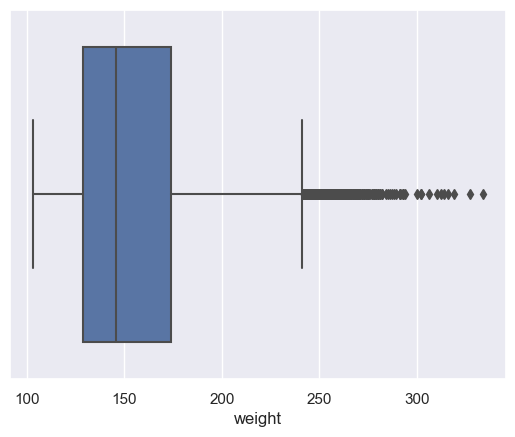

Anomalie wykryte przez Isolation Forest:        height  weight    scores  anomaly_score
229     183.0   291.0 -0.077042             -1
468     193.0   278.0 -0.052036             -1
635     193.0   265.0 -0.013495             -1
852     196.0   270.0 -0.030372             -1
1212    180.0   266.0 -0.014917             -1
...       ...     ...       ...            ...
13785   198.0   269.0 -0.024956             -1
13787   198.0   277.0 -0.049542             -1
13788   188.0   265.0 -0.013495             -1
13816   191.0   278.0 -0.052036             -1
13900   201.0   291.0 -0.077042             -1

[132 rows x 4 columns]


In [33]:
mean_weight = df_combined['weight'].mean()
std_weight = df_combined['weight'].std()

# Ustalanie granicy dla anomalii
cut_off = std_weight * 3
lower_bound, upper_bound = mean_weight - cut_off, mean_weight + cut_off

# Wykrywanie anomalii
outliers = df_combined[(df_combined['weight'] < lower_bound) | (df_combined['weight'] > upper_bound)]
print("Anomalie wykryte statystycznie:", outliers)


sns.boxplot(x=df_combined['weight'])
plt.show()

from sklearn.ensemble import IsolationForest

# Tworzenie modelu
clf = IsolationForest(n_estimators=100, max_samples='auto', contamination=float(0.01), random_state=42)
clf.fit(df_combined[['weight']])

# Predykcje
df_combined['scores'] = clf.decision_function(df_combined[['weight']])
df_combined['anomaly_score'] = clf.predict(df_combined[['weight']])

# Wykrywanie anomalii
anomalies = df_combined[df_combined['anomaly_score'] == -1]
print("Anomalie wykryte przez Isolation Forest:", anomalies)



             age_A     age_B  height_A  height_B   reach_A   reach_B  \
age_A     1.000000  0.231241  0.179819  0.272769  0.207948  0.236094   
age_B     0.231241  1.000000  0.272329  0.186831  0.262007  0.209467   
height_A  0.179819  0.272329  1.000000  0.739416  0.850750  0.631361   
height_B  0.272769  0.186831  0.739416  1.000000  0.674071  0.807873   
reach_A   0.207948  0.262007  0.850750  0.674071  1.000000  0.609459   
reach_B   0.236094  0.209467  0.631361  0.807873  0.609459  1.000000   
weight_A  0.313901  0.312970  0.830755  0.816436  0.769901  0.717438   
weight_B  0.307824  0.315363  0.822558  0.828556  0.761090  0.729181   
won_A     0.281289  0.016194 -0.026576  0.041373  0.012822  0.073909   
won_B     0.046221  0.271068  0.033926 -0.016243  0.065234  0.045407   
lost_A    0.323351 -0.090747 -0.067086  0.045617 -0.024425  0.068599   
lost_B   -0.071902  0.317030  0.030917 -0.062975  0.054736 -0.001119   
drawn_A   0.043213 -0.131423 -0.099600 -0.035238 -0.059744  0.00

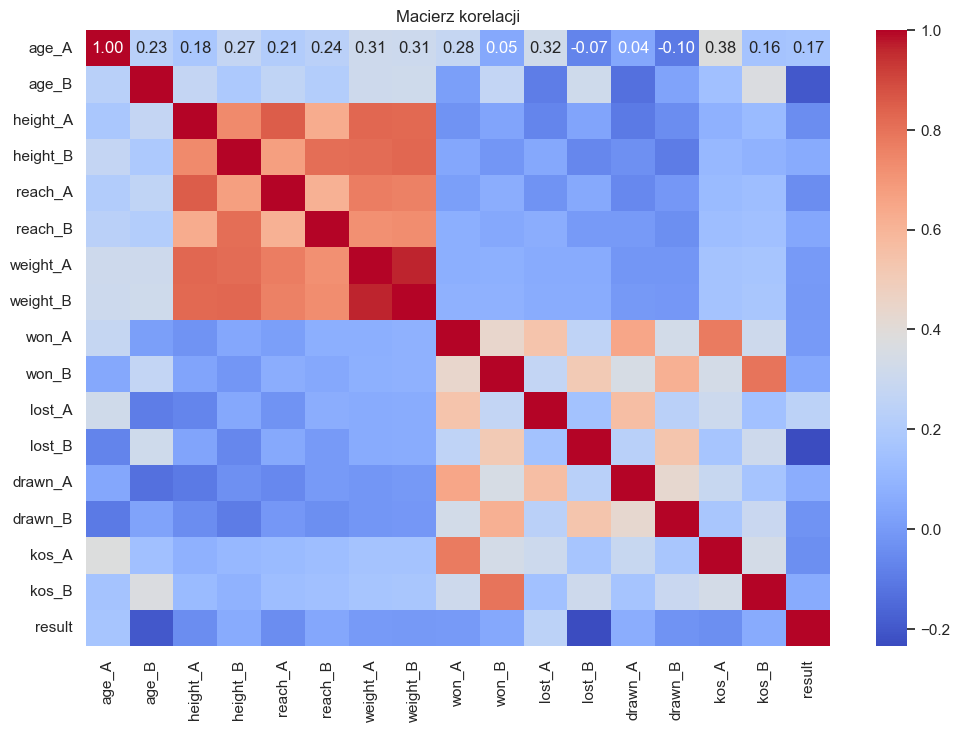

In [35]:
filtered_data_only_numeric = filtered_data[numeric_columns]
correlation_matrix = filtered_data_only_numeric.corr()
print(correlation_matrix)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Macierz korelacji')
plt.show()


Można zauważyć korelację między wzrostem i wagą, oraz między statystykami opisującymi nokauty i ilością wygranych.

Wymieszac bokser A z bokser B